In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
#to data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#NLP tools
import re
#import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

#train split and fit models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from nltk.tokenize import TweetTokenizer

#model selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [2]:
# Load data
df = pd.read_csv('hate-by-Kabada.csv',delimiter = ';', names=['Text','label'],encoding="utf-8")
#,count,hate_speech,offensive_language,neither,class,tweet
# Preprocess data

In [3]:
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10036 entries, 0 to 10036
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Text    10036 non-null  object 
 1   label   10036 non-null  float64
dtypes: float64(1), object(1)
memory usage: 235.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,10036.0,1.901156,1.210482,0.0,1.0,2.0,3.0,4.0


In [6]:
dt_transformed = df[['Text', 'label']]

In [7]:
x = df['Text']

In [8]:
y = df['label']

In [9]:
dt_transformed

,Text,label
0,Namni waan itti kenname hojjechuuf gahumsa hin...,4.0
1,ANI TPLF DEGEERA EEGA YOO AFUUFTUN KUN HUNDI P...,3.0
2,Bara Kana bittaa boondii fi arjooma garaagaraa...,0.0
3,Akka Aadde Adaanach jedhanitti Sagantaan maall...,0.0
4,afaa isin abbaan page kana maqaa hinjirre ykn ...,3.0
...,...,...
10032,Namoonni kun bineensa fucking yoomiyyuu hin ji...,4.0
10033,Qur'aana keessatti ifatti barreeffame jira Nam...,4.0
10034,"Deeggarsa Chaayinaa irraa , amantii kaansarii ...",4.0
10035,Muslimoonni waraana barbaadu! Kanaaf dursa gar...,4.0


In [10]:
#dt_transformed = dt_transformed['label']

In [11]:
# Dividindo o df em treino e teste
#df_train, df_test = train_test_split(dt_transformed, test_size = 0.10, random_state = 42, stratify=dt_transformed)
#df_train.shape, df_test.shape

In [12]:
#dt_transformed.value_counts().plot(kind='bar')

In [13]:
def preprocessing(data):
    #stemmer = nltk.stem.RSLPStemmer()
    #all_stopwords = stopwords.words('english')
    #all_stopwords.remove('not')
    corpus = []
    for tweet in data:
        review = re.sub(r"@[A-Za-z0-9_]+", " ", tweet)
        review = re.sub('RT', ' ', review)
        review = re.sub(r"https?://[A-Za-z0-9./]+", " ", review)
        review = re.sub(r"https?", " ", review)
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        #ps = PorterStemmer()
        #review = [ps.stem(word) for word in review if not word in set(all_stopwords) if len(word) > 2]
        review = ' '.join(review)
        corpus.append(review)
    return np.array(corpus)

In [14]:
# nltk.download('rslp')

In [15]:
corpus = preprocessing(x.values)
corpus.shape

(10036,)

In [16]:
corpus.shape

(10036,)

In [17]:
y.shape

(10036,)

In [18]:
# treino e validação do corpus
x_train, x_vad, y_train, y_vad = train_test_split(corpus, y, test_size = 0.10, random_state = 42)
x_train.shape, x_vad.shape

((9032,), (1004,))

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

In [44]:
tfidf_vect_unbgram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=50000)
tfidf_vect_unbgram.fit(x)
xtrain =  tfidf_vect_unbgram.transform(x_train)
xvalid =  tfidf_vect_unbgram.transform(x_vad)

In [45]:
#accuracy_of_unigram_and_bigram = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_unbgram, y_train, xvalid_tfidf_unbgram)

In [46]:
# Logistic Regression
#model = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model = RandomForestClassifier(n_estimators=100, random_state=1000)
#rf_classifier.fit(X_train, y_train)
model.fit(xtrain, y_train.ravel())
y_pred = model.predict(xvalid)

In [47]:
#rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_classifier.fit(X_train, y_train)

In [48]:
def set_confusion_matrix(clf, X, y, title):
    plot_confusion_matrix(clf, X, y)
    plt.title(title)
    plt.show()

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

In [50]:
 from sklearn.metrics import classification_report

In [51]:
target_names = ['Free', 'Offensive', ' Race','Politics', 'Religion']

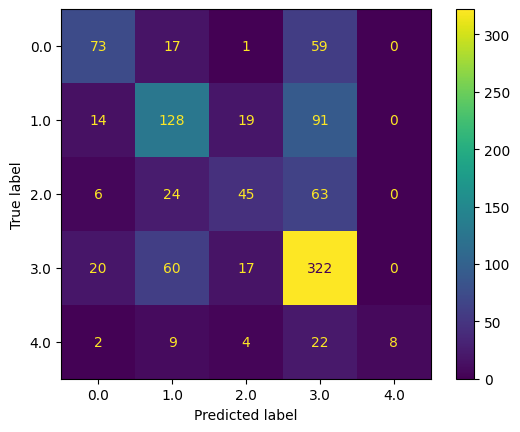

In [52]:
predictions = model.predict(xvalid)
cm = confusion_matrix(y_vad, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [53]:
target_names = ['Free', 'Offensive', ' Race','Politics', 'Religion']
print(classification_report(y_vad, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Free       0.63      0.49      0.55       150
   Offensive       0.54      0.51      0.52       252
        Race       0.52      0.33      0.40       138
    Politics       0.58      0.77      0.66       419
    Religion       1.00      0.18      0.30        45

    accuracy                           0.57      1004
   macro avg       0.65      0.45      0.49      1004
weighted avg       0.59      0.57      0.56      1004



In [54]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


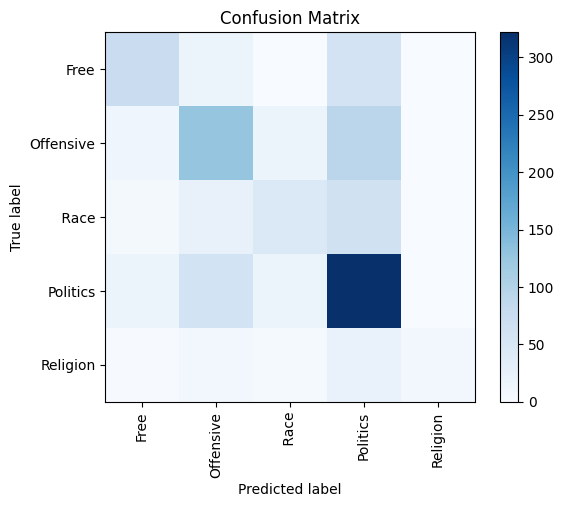

In [55]:
#y_pred = model.predict(x_test).argmax(axis=-1)
#matrix = metrics.confusion_matrix(y_test.argmax(axis=-1), y_pred)
matrix= metrics.confusion_matrix(y_vad, y_pred)
plot_confusion_matrix(cm=matrix, normalize=True, classes=target_names, title='Confusion Matrix')

In [56]:
#cm = confusion_matrix(y_test.argmax(axis=-1), y_pred)
df_cm = pd.DataFrame(matrix, index=target_names, columns=target_names)
import seaborn as sns

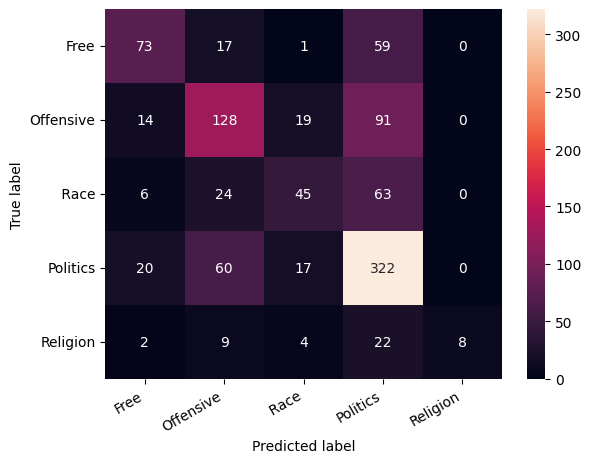

In [57]:
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');